In [1]:
import pandas as pd
df = pd.read_csv('twitter_dataset.csv')

In [2]:
df.head()

Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  
0  2023-01-30 11:00:51  
1  2023-01-02 22:45:58  
2  2023-01-18 11:25:19  
3  2023-04-10 22:06:29  
4  2023-01-24 07:12:21

In [3]:
df.shape

(10000, 6)

In [4]:
df.isnull().sum()

Tweet_ID     0
Username     0
Text         0
Retweets     0
Likes        0
Timestamp    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')

In [8]:
df.Likes.value_counts()

90    126
54    120
53    114
24    113
58    113
     ... 
70     83
18     83
96     83
99     83
94     76
Name: Likes, Length: 101, dtype: int64

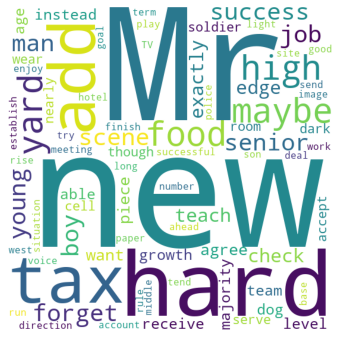

In [9]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text):

    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 550, height = 550, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 12).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 

    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # show plot
    plt.show()
    
paragraph=' '.join(df.Text.tolist())
word_cloud(paragraph)

In [10]:
# Clean tweet text by removing special characters and URLs
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6692\1034823353.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_6692\1034823353.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from textblob import TextBlob

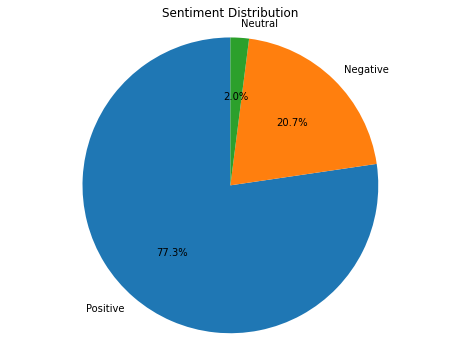

In [12]:
# Perform sentiment analysis on tweet text
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# Calculate the count of each sentiment category
sentiment_counts = df['Sentiment Category'].value_counts()

# Plot a pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

In [13]:
df.head()

Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single Prevent prev...         2     25   
1  Hotel still Congress may member staff Media dr...        35     29   
2  Nice be her debate industry that year Film whe...        51     25   
3  Laugh explain situation career occur serious F...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp  Sentiment Sentiment Category  
0  2023-01-30 11:00:51   0.115714           Positive  
1  2023-01-02 22:45:58   0.308333           Positive  
2  2023-01-18 11:25:19   0.220000           Positive  
3  2023-04-10 22:06:29   0.054762           Positive  
4  2023-01-24 07:12:21   0.033333           Positive

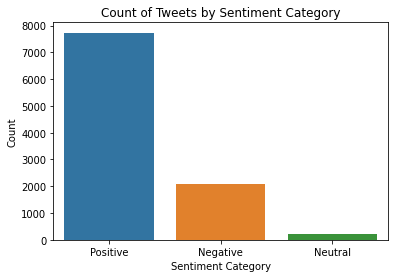

In [14]:
# Plot the count of tweets by sentiment category
import seaborn as sns
sns.countplot(x='Sentiment Category', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Count of Tweets by Sentiment Category')
plt.show()


In [15]:
df['Sentiment Category'] = df['Sentiment Category'].map({'Negative':-1,'Neutral':0,'Positive':1})

In [16]:
df['Sentiment Category'].unique()

array([ 1, -1,  0], dtype=int64)

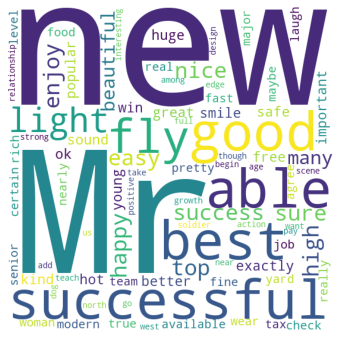

In [17]:
paragraph=' '.join(df[df['Sentiment Category'] == 1].Text.tolist())
word_cloud(paragraph)

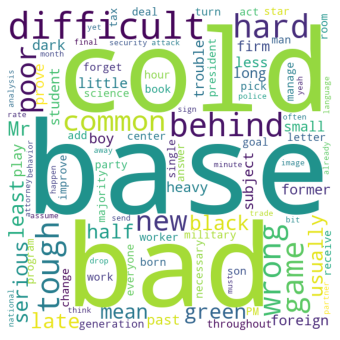

In [18]:
paragraph=' '.join(df[df['Sentiment Category'] == -1].Text.tolist())
word_cloud(paragraph)

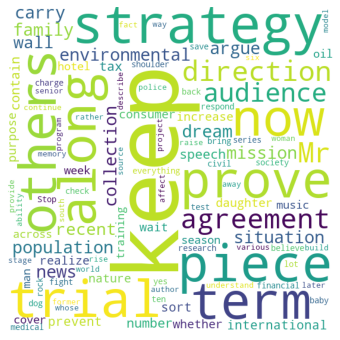

In [19]:
paragraph=' '.join(df[df['Sentiment Category'] == 0].Text.tolist())
word_cloud(paragraph)

In [21]:
# Bag of word: vectors word frequency(count)
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from data like symbols

token = RegexpTokenizer(r'[a-zA-Z0-9]+')

cv = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = token.tokenize)

text_counts= cv.fit_transform(df['Text'])

print(text_counts.shape)

(10000, 763)


In [22]:
count_df = pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
count_df.head()

C:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


ability  able  accept  according  account  act  action  activity  actually  \
0        0     0       0          0        0    0       0         0         0   
1        0     0       0          0        0    0       0         0         0   
2        0     0       0          0        0    0       0         0         0   
3        0     0       0          0        0    0       0         0         0   
4        0     0       0          0        0    0       0         0         0   

   add  ...  world  worry  write  writer  wrong  yard  yeah  year  yes  young  
0    0  ...      0      0      0       0      0     0     0     0    0      0  
1    0  ...      0      0      0       0      0     0     0     0    0      0  
2    0  ...      0      0      0       0      0     1     0     1    0      0  
3    0  ...      0      0      0       0      0     0     0     0    0      0  
4    0  ...      0      0      0       0      0     0     0     0    0      0  

[5 rows x 763 columns]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                    df['Sentiment Category'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [25]:
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.8373333333333334


In [34]:
# Transform into matrix
val=cv.transform(["This is Great"])

# make prediction
clf.predict(val)

array([1], dtype=int64)